<center>
<h1> Assignment 1 </h1>
</center>

In [123]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

## Data Exploration

In [83]:
data = pd.read_csv('conversion_data.csv')
data.head(n=10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [84]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


It is highly unlikely for a person aged 123 to shop online. Hence, this gives us an indication that there may be outliers in our data. We explore more about these outliers by plotting the ages using matplotlib's pyplot.

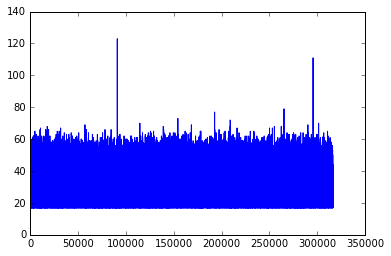

In [85]:
plt.plot(data.age)

In [86]:
plt.show()

The plot shows that a majority of the data is concentrated below the age of 80. So we truncate the data for ages above 80.

In [87]:
data=data.loc[data.age<=80]

In [88]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


Next, we explore the country distributions for the online traffic.

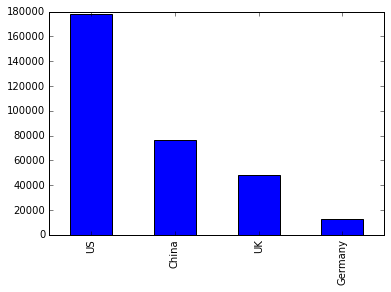

In [89]:
data.country.value_counts().plot(kind='bar')

In [90]:
data.groupby('country').mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


One interesting thing to note here is that all the countried have nearly the same average age, new user percentage and pages visited. Thus, we need to explore why Germany has the highest percentage of converted consumers. We explore the source coumn to get further insights on this.

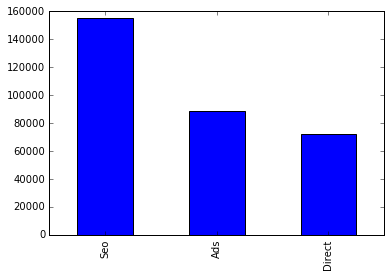

In [91]:
data.source.value_counts().plot(kind='bar')

## Predictive Modeling

### Creating of Dummy Variables (Data Separation - Christian Garay's Code)

In [92]:
dummy_country = pd.get_dummies(data['country'], prefix='country')
dummy_source = pd.get_dummies(data['source'], prefix='source')
data = data[['age', 'new_user', 'total_pages_visited', 'converted']].join([dummy_country, dummy_source])
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,35,1,6,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,1,7,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,35,0,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,1,14,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,32,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Logistic Regression

In [96]:
datatrain=data.ix[:0.7*len(data)]
datatest=data.ix[0.7*len(data):]
Xtrain = datatrain[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
ytrain = datatrain[['converted']]
Xtest = datatest[['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']]
ytest = datatest[['converted']]
ytrain = np.ravel(ytrain)
ytest=np.ravel(ytest)

The data hs been shuffled and devided into training and test sets in a 70-30 ratio. the model from the training set is used to predict the values for the test set and the overall accuracy is determined by the overlap between the predicted and actual value of whether the customer converted.

In [97]:
model = LogisticRegression()

In [98]:
model = model.fit(Xtrain, ytrain)
model.score(Xtrain, ytrain)

0.98594011900297729

In [102]:
ypred=model.predict(Xtest)

In [107]:
ypred=list(ypred)
ytest=list(ytest)

In [119]:
sum=0
for i in range(len(ypred)):
    if(ypred[i] == ytest[i]):
        sum+=1
avg=sum/len(ypred)*100
avg

98.66749596769942

In [122]:
print("The predicted accuracy is "+str(avg+"%")

The predicted accuracy is 98.66749596769942%
